<a href="https://colab.research.google.com/github/arzumanyansona/object_detection_yolov8/blob/main/Object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation
from keras.layers import Dropout
from keras.layers import Convolution2D, MaxPooling2D
from keras.datasets import cifar10


In [ ]:
!pip install --upgrade keras

  Using cached keras-3.0.2-py3-none-any.whl (1.0 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0.post1 requires keras<2.16,>=2.15.0, but you have keras 3.0.2 which is incompatible.


In [ ]:
!pip install --upgrade tensorflow

  Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 3.0.2
    Uninstalling keras-3.0.2:
      Successfully uninstalled keras-3.0.2


In [ ]:
!pip install np_utils

In [5]:
from keras.utils import to_categorical

In [6]:
numpy.random.seed(42)

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [7]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /=255
X_test /=255

In [9]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Continue adding layers as needed for your specific architecture

# Example of flattening and adding dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))  # Adjust the number of units for your task

# Compile the model
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                        

In [11]:
model.fit(X_train, Y_train, batch_size =32, epochs = 2, validation_split = 0.1, shuffle = True)

Epoch 1/2
1407/1407 [==============================] - 135s 95ms/step - loss: 2.0153 - accuracy: 0.2665 - val_loss: 1.9406 - val_accuracy: 0.2984
Epoch 2/2
1407/1407 [==============================] - 134s 95ms/step - loss: 1.7113 - accuracy: 0.3882 - val_loss: 1.5660 - val_accuracy: 0.4426


In [12]:
scores = model.evaluate(X_test, Y_test, verbose=0)

In [13]:
scores[1]*100

44.81000006198883

In [19]:
def display_image(image):
  fig = plt.figure(figsize=(10,8))
  plt.grid(False)
  plt.imshow(image)

In [20]:
from matplotlib import pyplot as plt

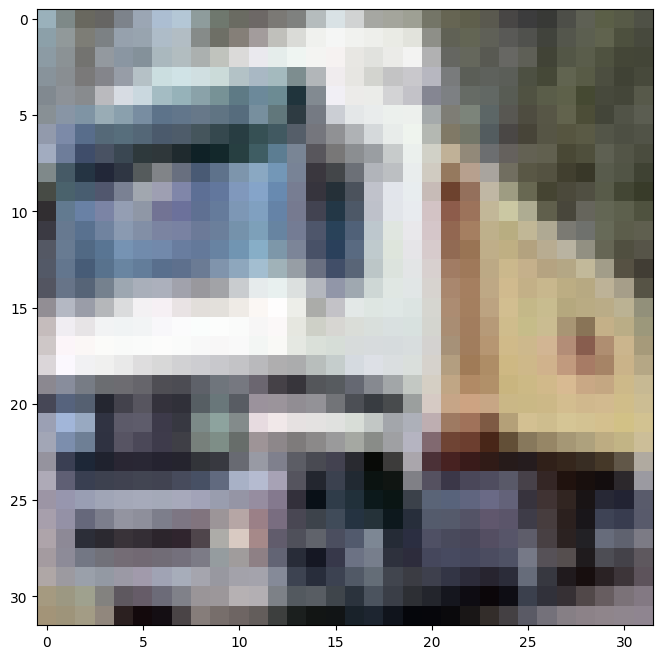

In [21]:
display_image(X_train[1])